In [67]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Notes

* ISO/ISO3 has three entries (~0.2%) have been wrongly coded as Republic of Congo ('178/COG'). Rest are Democratic Republic of Congo '180/COD'.

* There is a time_precision column. ~90% is 1, 9% is 2 and 1% is 3.  Similarly for geo_precision (55% is 1, 44% is 2 and 1% is 3). Perhaps qualitative scales but not sure how to use.

* There are (actor, associated actor) 1 and 2. Might be useful to map out the network of current conflicting entities.  

* inter1, inter2 and interaction seem to denote actor types. Not using for now. 

* Need to parse out the multiple sources (separated by semi-colon). Also multiple source scales ('National, International, Subnational, Other, Local, Regional) separated by hyphen.

* Some NLP might be required for notes.

* Timestamp field has upload date. Not using for now.


In [56]:
acled_df = pd.read_excel('../data/acled/ACLED_Ituri-NordKivu_20180802-20190705.xlsx',parse_dates=['event_date'])
acled_df.columns

Index(['data_id', 'iso', 'event_id_cnty', 'event_id_no_cnty', 'event_date',
       'year', 'time_precision', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'region', 'country', 'admin1', 'admin2', 'admin3',
       'location', 'latitude', 'longitude', 'geo_precision', 'source',
       'source_scale', 'notes', 'fatalities', 'timestamp', 'iso3'],
      dtype='object')

In [57]:
useful_cols = ['event_id_cnty','event_date','event_type','sub_event_type','actor1','assoc_actor_1','actor2','assoc_actor_2', 'admin1','admin2','admin3','location','latitude','longitude', 'source','source_scale','notes','fatalities']
acled_df = acled_df[useful_cols]

In [58]:
acled_df = acled_df[acled_df.admin1.isin(['Nord-Kivu','Ituri'])]
acled_df['event_date'] = pd.to_datetime(acled_df.event_date)

In [86]:
acled_df['year_week'] = acled_df.event_date.dt.year.astype(str).values + ['W{:02d}'.format(x) for x in  acled_df.event_date.dt.week.values]

Text(0.5, 1.0, 'Total events - weekly')

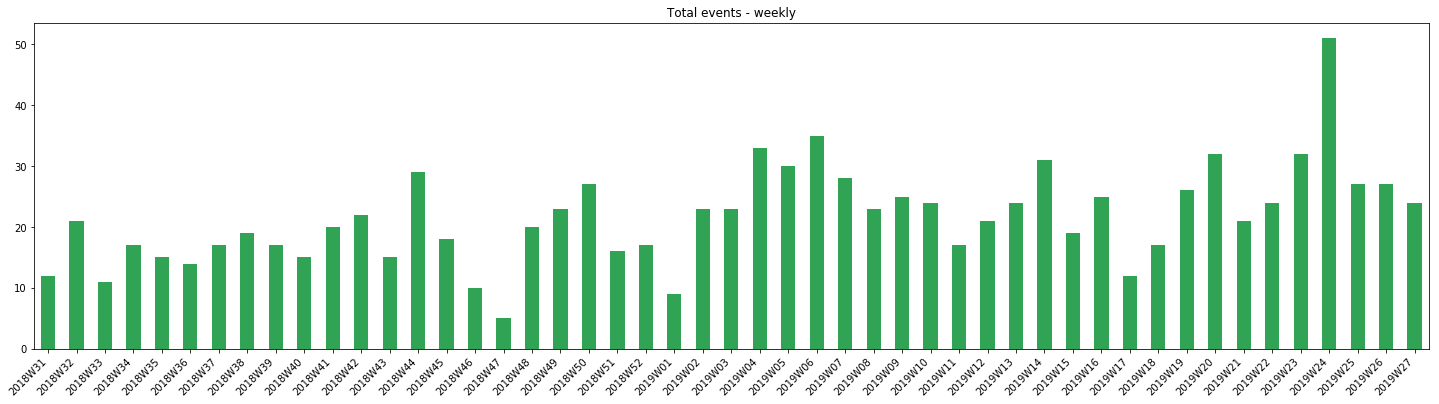

In [103]:
plt.figure(figsize=(25,6))
ax = plt.gca()
acled_df.year_week.value_counts().sort_index().plot(kind='bar',color='#31a354',ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right')
plt.title('Total events - weekly')